In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import tensorcircuit as tc
from models import *
from datar import *
from poison_unlearn import *

K = tc.set_backend("jax")
tc.set_dtype("complex128")
tc.set_contractor("cotengra")

/Users/chenqinqin/opt/anaconda3/envs/ssenv/lib/python3.10/site-packages/cotengra/hyperoptimizers/hyper.py:54: UserWarning: Couldn't find `optuna`, `cmaes`, or `nevergrad` so will use completely random sampling in place of hyper-optimization.
  warnings.warn(
/Users/chenqinqin/opt/anaconda3/envs/ssenv/lib/python3.10/site-packages/cotengra/hyperoptimizers/hyper.py:36: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(
/Users/chenqinqin/opt/anaconda3/envs/ssenv/lib/python3.10/site-packages/cotengra/hyperoptimizers/hyper.py:73: UserWarning: Couldn't find `optuna`, `cmaes`, or `nevergrad` so will use completely random sampling in place of hyper-optimization.
  warnings.warn(


functools.partial(<function custom at 0x292a0ac20>, optimizer=<cotengra.hyperoptimizers.hyper.ReusableHyperOptimizer object at 0x292b0bbe0>, memory_limit=None, debug_level=0)

## plot

In [ ]:
def plotdata(results,ave,selec):
    selected_cols = np.random.choice(ave,selec,replace=False) 
    na=[]
    for case in ["acc","val_acc"]:
        val_accs = [results[i][case] for i in range(len(results))]
        val_accs_reshaped = np.array(val_accs).reshape(-1, ave)
        means_every_three = np.mean(val_accs_reshaped[:, selected_cols], axis=1) 
        na.append(means_every_three)
    return na

data = np.load("xxz_phase.npy", allow_pickle=True)

na = plotdata(data[1],5,5)
nb = plotdata(data[0],5,5)  
nc = plotdata(data[3],5,5)
nd = plotdata(data[2],5,5)


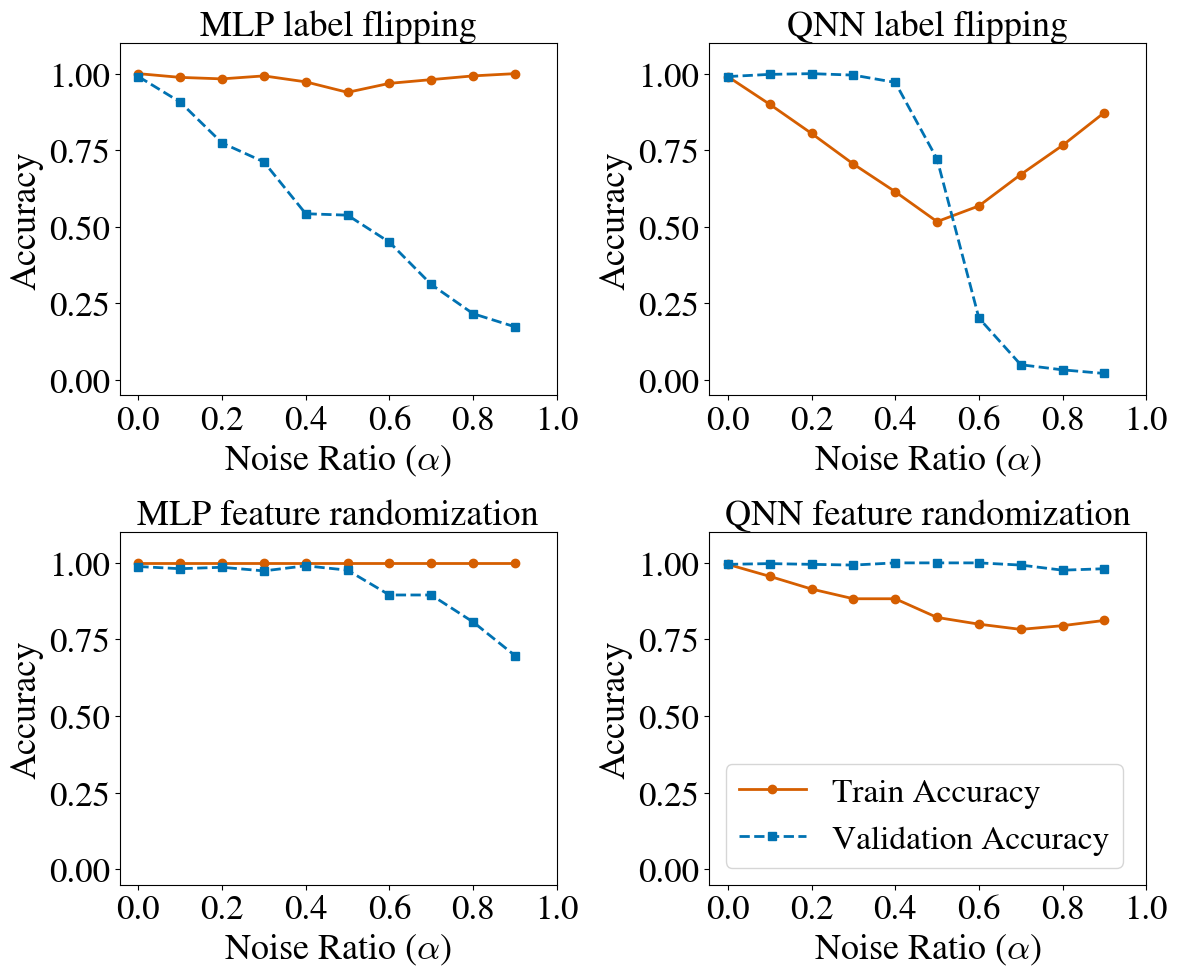

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['mathtext.fontset'] = 'cm'     
plt.rcParams['font.family'] = 'STIXGeneral' 
plt.rcParams['font.size'] = 14             


x_data = np.arange(0., 1., 0.1)


plot_data = [
    {'data': na, 'title': 'MLP label flipping'},
    {'data': nb, 'title': 'QNN label flipping'},
    {'data': nc, 'title': 'MLP feature randomization'},
    {'data': nd, 'title': 'QNN feature randomization'} 
]


fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes_flat = axes.flatten()


for i, ax in enumerate(axes_flat):
    current_plot = plot_data[i]
    data = current_plot['data']
    title = current_plot['title']
    

    ax.plot(x_data, data[0], 
            label='Train Accuracy', 
            color='#D55E00',  
            marker='o',       
            linestyle='-',    
            linewidth=2)
    # val_acc
    ax.plot(x_data, data[1], 
            label='Validation Accuracy', 
            color='#0072B2',  
            marker='s',       
            linestyle='--',  
            linewidth=2)

   
    ax.set_title(title, fontsize=26)
    if i>-1:  #i ==2  or i==3:
        ax.set_xlabel('Noise Ratio ($\\alpha$)', fontsize=26)
    if i>-1: #i ==2  or i==0:
        ax.set_ylabel('Accuracy', fontsize=26)
    
    
    if i ==3:
        ax.legend(loc='lower left',fontsize=24)
    # ax.grid(True, linestyle=':', alpha=0.6)
    ax.set_ylim(-0.05, 1.1) 
    ax.set_xticks(np.arange(0, 1.1, 0.2)) 
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)


plt.tight_layout()

plt.show()

fig.savefig("combined_accuracy_xxz.pdf", format='pdf', bbox_inches='tight')

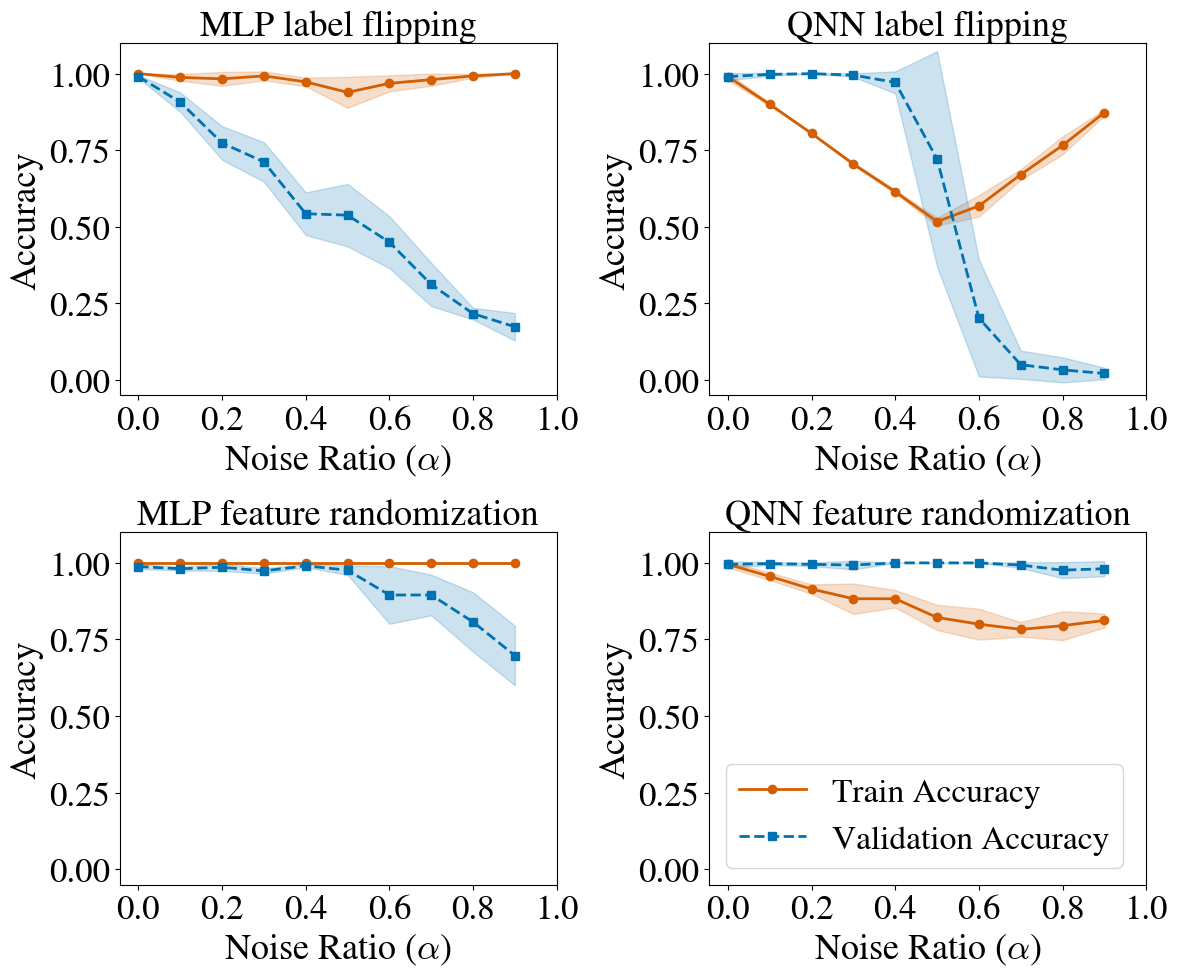

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plotdata(results, ave, selec):

    selected_cols = np.random.choice(ave, selec, replace=False) 

    output_data = {}

    for case in ["acc", "val_acc"]:

        accs_all_runs = [results[i][case] for i in range(len(results))]

        accs_reshaped = np.array(accs_all_runs).reshape(-1, ave)
  
        selected_data = accs_reshaped[:, selected_cols]

        means = np.mean(selected_data, axis=1) 
        stds = np.std(selected_data, axis=1) 

        if case == "acc":
            output_data['train_mean'] = means
            output_data['train_std'] = stds
        else: # case == "val_acc"
            output_data['val_mean'] = means
            output_data['val_std'] = stds
            
    return output_data


data = np.load("xxz_phase.npy", allow_pickle=True)


na = plotdata(data[1], 5, 5)
nb = plotdata(data[0], 5, 5)
nc = plotdata(data[3], 5, 5)
nd = plotdata(data[2], 5, 5)


plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 14

x_data = np.arange(0., 1., 0.1)


plot_data = [
    {'data': na, 'title': 'MLP label flipping'},
    {'data': nb, 'title': 'QNN label flipping'},
    {'data': nc, 'title': 'MLP feature randomization'},
    {'data': nd, 'title': 'QNN feature randomization'}
]


fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes_flat = axes.flatten()

for i, ax in enumerate(axes_flat):
    current_plot = plot_data[i]
    data_dict = current_plot['data'] 
    title = current_plot['title']
    

    train_mean, train_std = data_dict['train_mean'], data_dict['train_std']
    val_mean, val_std = data_dict['val_mean'], data_dict['val_std']


    ax.plot(x_data, train_mean, 
            label='Train Accuracy', 
            color='#D55E00', marker='o', linestyle='-', linewidth=2, zorder=3)

    ax.fill_between(x_data, train_mean - train_std, train_mean + train_std, 
                    color='#D55E00', alpha=0.2, zorder=2)


    ax.plot(x_data, val_mean, 
            label='Validation Accuracy', 
            color='#0072B2', marker='s', linestyle='--', linewidth=2, zorder=3)

    ax.fill_between(x_data, val_mean - val_std, val_mean + val_std, 
                    color='#0072B2', alpha=0.2, zorder=2)


    ax.set_title(title, fontsize=26)
    if i > -1:
        ax.set_xlabel('Noise Ratio ($\\alpha$)', fontsize=26)
    if i > -1:
        ax.set_ylabel('Accuracy', fontsize=26)
    
    if i == 3:
        ax.legend(loc='lower left', fontsize=24)
    ax.set_ylim(-0.05, 1.1)
    ax.set_xticks(np.arange(0, 1.1, 0.2))
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)

plt.tight_layout()
plt.show()
fig.savefig("combined_accuracy_with_error_xxz.pdf", format='pdf', bbox_inches='tight')

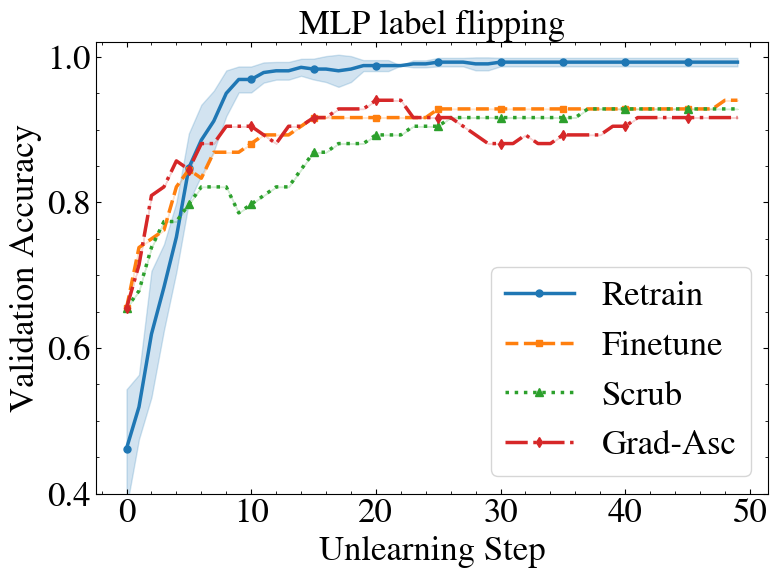

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def pplot(results, name, ave):
 
    val_accs = [results[i]["metrilist"] for i in range(len(results))]
    
    acc = []
    for i in range(ave):
        for j in range(len(val_accs[i])):
            acc.append(val_accs[i][j][name])
            
  
    val_accs_reshaped = np.array(acc).reshape(ave, -1)
    

    means = np.mean(val_accs_reshaped, axis=0)
    stds = np.std(val_accs_reshaped, axis=0)
    
    return means, stds

data = np.load("xxz_mlp_y.npy", allow_pickle=True)

ave = 5
pp = "val_acc"

repp_mean, repp_std = pplot(data[0], pp, ave)
cfpp_mean, cfpp_std = pplot(data[1], pp, ave)
scpp_mean, scpp_std = pplot(data[2], pp, ave)
gapp_mean, gapp_std = pplot(data[3], pp, ave)


steps = np.arange(50)

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 14

fig, ax = plt.subplots(figsize=(8, 6))

colors = {
    'retrain': '#1f77b4',
    'finetune': '#ff7f0e',
    'scrub': '#2ca02c',
    'grad_asc': '#d62728'
}

styles = {
    'retrain': {'linestyle': '-', 'marker': 'o', 'markersize': 5, 'linewidth': 2.5},
    'finetune': {'linestyle': '--', 'marker': 's', 'markersize': 5, 'linewidth': 2.5},
    'scrub': {'linestyle': ':', 'marker': '^', 'markersize': 6, 'linewidth': 2.5},
    'grad_asc': {'linestyle': '-.', 'marker': 'd', 'markersize': 5, 'linewidth': 2.5}
}

mark_every = 5

ax.plot(steps, repp_mean, label="Retrain", color=colors['retrain'], markevery=mark_every, **styles['retrain'])
ax.fill_between(steps, repp_mean - repp_std, repp_mean + repp_std, color=colors['retrain'], alpha=0.2)

ax.plot(steps, cfpp_mean, label="Finetune", color=colors['finetune'], markevery=mark_every, **styles['finetune'])
ax.fill_between(steps, cfpp_mean - cfpp_std, cfpp_mean + cfpp_std, color=colors['finetune'], alpha=0.2)

ax.plot(steps, scpp_mean, label="Scrub", color=colors['scrub'], markevery=mark_every, **styles['scrub'])
ax.fill_between(steps, scpp_mean - scpp_std, scpp_mean + scpp_std, color=colors['scrub'], alpha=0.2)

ax.plot(steps, gapp_mean, label="Grad-Asc", color=colors['grad_asc'], markevery=mark_every, **styles['grad_asc'])
ax.fill_between(steps, gapp_mean - gapp_std, gapp_mean + gapp_std, color=colors['grad_asc'], alpha=0.2)

ax.set_xlabel("Unlearning Step", fontsize=25)
ax.set_ylabel("Validation Accuracy", fontsize=25)
ax.legend(fontsize=25, loc='lower right', frameon=True)
ax.tick_params(axis='both', which='major', labelsize=25, direction='in', top=True, right=True)
ax.tick_params(axis='both', which='minor', direction='in', top=True, right=True)
ax.set_ylim(bottom=0.4, top=1.02)
ax.set_title('MLP label flipping',fontsize=25)
ax.minorticks_on()
plt.tight_layout()


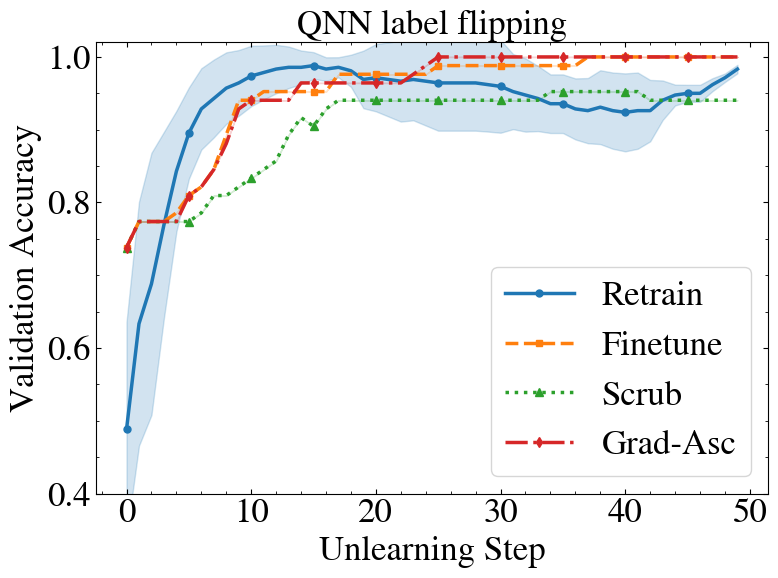

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def pplot(results, name, ave):

    val_accs = [results[i]["metrilist"] for i in range(len(results))]

    acc = []
    for i in range(ave):
        for j in range(len(val_accs[i])):
            acc.append(val_accs[i][j][name])

    val_accs_reshaped = np.array(acc).reshape(ave, -1)

    means = np.mean(val_accs_reshaped, axis=0)
    stds = np.std(val_accs_reshaped, axis=0)
    
    return means, stds


data = np.load("xxz_qnn_y.npy", allow_pickle=True)


ave = 5
pp = "val_acc"

repp_mean, repp_std = pplot(data[0], pp, ave)
cfpp_mean, cfpp_std = pplot(data[1], pp, ave)
scpp_mean, scpp_std = pplot(data[2], pp, ave)
gapp_mean, gapp_std = pplot(data[3], pp, ave)

steps = np.arange(50)

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 14

fig, ax = plt.subplots(figsize=(8, 6))

colors = {
    'retrain': '#1f77b4',
    'finetune': '#ff7f0e',
    'scrub': '#2ca02c',
    'grad_asc': '#d62728'
}

styles = {
    'retrain': {'linestyle': '-', 'marker': 'o', 'markersize': 5, 'linewidth': 2.5},
    'finetune': {'linestyle': '--', 'marker': 's', 'markersize': 5, 'linewidth': 2.5},
    'scrub': {'linestyle': ':', 'marker': '^', 'markersize': 6, 'linewidth': 2.5},
    'grad_asc': {'linestyle': '-.', 'marker': 'd', 'markersize': 5, 'linewidth': 2.5}
}

mark_every = 5


ax.plot(steps, repp_mean, label="Retrain", color=colors['retrain'], markevery=mark_every, **styles['retrain'])
ax.fill_between(steps, repp_mean - repp_std, repp_mean + repp_std, color=colors['retrain'], alpha=0.2)

ax.plot(steps, cfpp_mean, label="Finetune", color=colors['finetune'], markevery=mark_every, **styles['finetune'])
ax.fill_between(steps, cfpp_mean - cfpp_std, cfpp_mean + cfpp_std, color=colors['finetune'], alpha=0.2)

ax.plot(steps, scpp_mean, label="Scrub", color=colors['scrub'], markevery=mark_every, **styles['scrub'])
ax.fill_between(steps, scpp_mean - scpp_std, scpp_mean + scpp_std, color=colors['scrub'], alpha=0.2)

ax.plot(steps, gapp_mean, label="Grad-Asc", color=colors['grad_asc'], markevery=mark_every, **styles['grad_asc'])
ax.fill_between(steps, gapp_mean - gapp_std, gapp_mean + gapp_std, color=colors['grad_asc'], alpha=0.2)

ax.set_xlabel("Unlearning Step", fontsize=25)
ax.set_ylabel("Validation Accuracy", fontsize=25)
ax.legend(fontsize=25, loc='lower right', frameon=True)
ax.tick_params(axis='both', which='major', labelsize=25, direction='in', top=True, right=True)
ax.tick_params(axis='both', which='minor', direction='in', top=True, right=True)
ax.set_ylim(bottom=0.4, top=1.02)
ax.set_title('QNN label flipping',fontsize=25)
ax.minorticks_on()
plt.tight_layout()


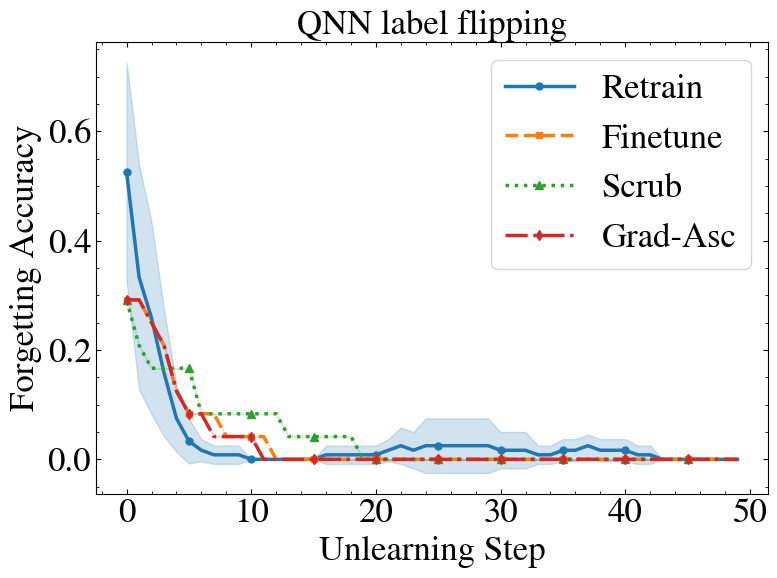

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def pplot(results, name, ave):
    val_accs = [results[i]["metrilist"] for i in range(len(results))]

    acc = []
    for i in range(ave):
        for j in range(len(val_accs[i])):
            acc.append(val_accs[i][j][name])
            
    val_accs_reshaped = np.array(acc).reshape(ave, -1)

    means = np.mean(val_accs_reshaped, axis=0)
    stds = np.std(val_accs_reshaped, axis=0)
    
    return means, stds

data = np.load("xxz_qnn_y.npy", allow_pickle=True)

ave = 5
pp = "forget_acc"

repp_mean, repp_std = pplot(data[0], pp, ave)
cfpp_mean, cfpp_std = pplot(data[1], pp, ave)
scpp_mean, scpp_std = pplot(data[2], pp, ave)
gapp_mean, gapp_std = pplot(data[3], pp, ave)

steps = np.arange(50)

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 14

fig, ax = plt.subplots(figsize=(8, 6))

colors = {
    'retrain': '#1f77b4',
    'finetune': '#ff7f0e',
    'scrub': '#2ca02c',
    'grad_asc': '#d62728'
}

styles = {
    'retrain': {'linestyle': '-', 'marker': 'o', 'markersize': 5, 'linewidth': 2.5},
    'finetune': {'linestyle': '--', 'marker': 's', 'markersize': 5, 'linewidth': 2.5},
    'scrub': {'linestyle': ':', 'marker': '^', 'markersize': 6, 'linewidth': 2.5},
    'grad_asc': {'linestyle': '-.', 'marker': 'd', 'markersize': 5, 'linewidth': 2.5}
}

mark_every = 5

ax.plot(steps, 1 - repp_mean, label="Retrain", color=colors['retrain'], markevery=mark_every, **styles['retrain'])
ax.fill_between(steps, (1 - repp_mean) - repp_std, (1 - repp_mean) + repp_std, color=colors['retrain'], alpha=0.2)

ax.plot(steps, 1 - cfpp_mean, label="Finetune", color=colors['finetune'], markevery=mark_every, **styles['finetune'])
ax.fill_between(steps, (1 - cfpp_mean) - cfpp_std, (1 - cfpp_mean) + cfpp_std, color=colors['finetune'], alpha=0.2)

ax.plot(steps, 1 - scpp_mean, label="Scrub", color=colors['scrub'], markevery=mark_every, **styles['scrub'])
ax.fill_between(steps, (1 - scpp_mean) - scpp_std, (1 - scpp_mean) + scpp_std, color=colors['scrub'], alpha=0.2)

ax.plot(steps, gapp_mean, label="Grad-Asc", color=colors['grad_asc'], markevery=mark_every, **styles['grad_asc'])
ax.fill_between(steps, gapp_mean - gapp_std, gapp_mean + gapp_std, color=colors['grad_asc'], alpha=0.2)

ax.set_xlabel("Unlearning Step", fontsize=25)
ax.set_ylabel("Forgetting Accuracy", fontsize=25) 
ax.legend(fontsize=25, loc='upper right', frameon=True)
ax.tick_params(axis='both', which='major', labelsize=25, direction='in', top=True, right=True)
ax.tick_params(axis='both', which='minor', direction='in', top=True, right=True)
# ax.set_ylim(bottom=0.4, top=1.02)
ax.set_title('QNN label flipping',fontsize=25)
ax.minorticks_on()
plt.tight_layout()


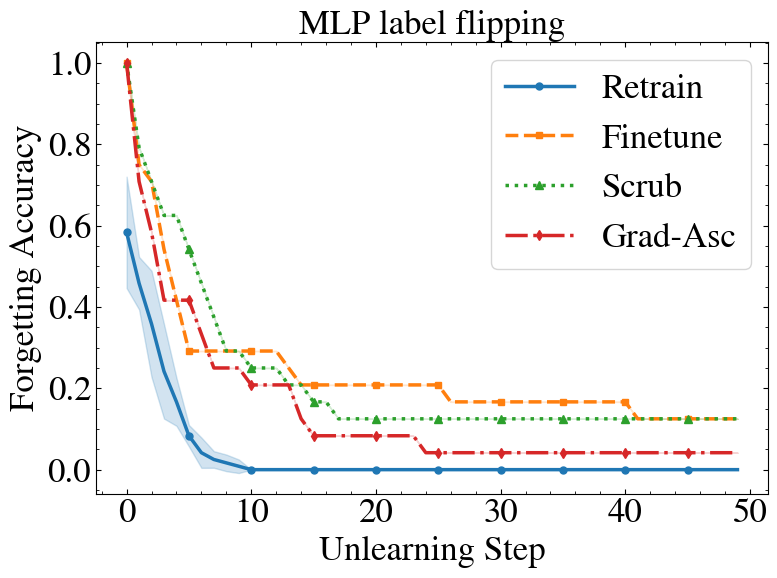

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def pplot(results, name, ave):

    val_accs = [results[i]["metrilist"] for i in range(len(results))]
 
    acc = []
    for i in range(ave):
        for j in range(len(val_accs[i])):
            acc.append(val_accs[i][j][name])

    val_accs_reshaped = np.array(acc).reshape(ave, -1)

    means = np.mean(val_accs_reshaped, axis=0)
    stds = np.std(val_accs_reshaped, axis=0)
    
    return means, stds

data = np.load("xxz_mlp_y.npy", allow_pickle=True)

ave = 5
pp = "forget_acc"

repp_mean, repp_std = pplot(data[0], pp, ave)
cfpp_mean, cfpp_std = pplot(data[1], pp, ave)
scpp_mean, scpp_std = pplot(data[2], pp, ave)
gapp_mean, gapp_std = pplot(data[3], pp, ave)

steps = np.arange(50)

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 14

fig, ax = plt.subplots(figsize=(8, 6))

colors = {
    'retrain': '#1f77b4',
    'finetune': '#ff7f0e',
    'scrub': '#2ca02c',
    'grad_asc': '#d62728'
}

styles = {
    'retrain': {'linestyle': '-', 'marker': 'o', 'markersize': 5, 'linewidth': 2.5},
    'finetune': {'linestyle': '--', 'marker': 's', 'markersize': 5, 'linewidth': 2.5},
    'scrub': {'linestyle': ':', 'marker': '^', 'markersize': 6, 'linewidth': 2.5},
    'grad_asc': {'linestyle': '-.', 'marker': 'd', 'markersize': 5, 'linewidth': 2.5}
}

mark_every = 5

ax.plot(steps, 1 - repp_mean, label="Retrain", color=colors['retrain'], markevery=mark_every, **styles['retrain'])
ax.fill_between(steps, (1 - repp_mean) - repp_std, (1 - repp_mean) + repp_std, color=colors['retrain'], alpha=0.2)

ax.plot(steps, 1 - cfpp_mean, label="Finetune", color=colors['finetune'], markevery=mark_every, **styles['finetune'])
ax.fill_between(steps, (1 - cfpp_mean) - cfpp_std, (1 - cfpp_mean) + cfpp_std, color=colors['finetune'], alpha=0.2)

ax.plot(steps, 1 - scpp_mean, label="Scrub", color=colors['scrub'], markevery=mark_every, **styles['scrub'])
ax.fill_between(steps, (1 - scpp_mean) - scpp_std, (1 - scpp_mean) + scpp_std, color=colors['scrub'], alpha=0.2)

ax.plot(steps, gapp_mean, label="Grad-Asc", color=colors['grad_asc'], markevery=mark_every, **styles['grad_asc'])
ax.fill_between(steps, gapp_mean - gapp_std, gapp_mean + gapp_std, color=colors['grad_asc'], alpha=0.2)

ax.set_xlabel("Unlearning Step", fontsize=25)
ax.set_ylabel("Forgetting Accuracy", fontsize=25) 
ax.legend(fontsize=25, loc='upper right', frameon=True)
ax.tick_params(axis='both', which='major', labelsize=25, direction='in', top=True, right=True)
ax.tick_params(axis='both', which='minor', direction='in', top=True, right=True)
# ax.set_ylim(bottom=0.4, top=1.02)
ax.set_title('MLP label flipping',fontsize=25)
ax.minorticks_on()
plt.tight_layout()


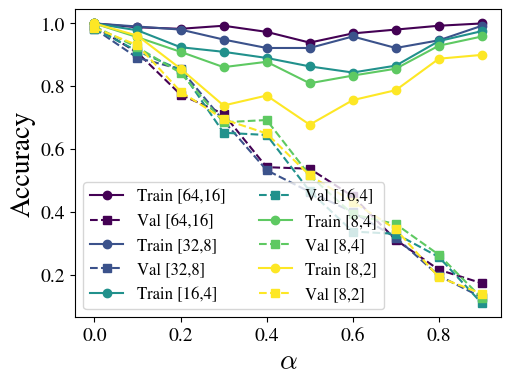

In [ ]:

alphas = np.arange(0,1,0.1) 

plt.figure(figsize=(5.5, 4))

label_map = {
    1: "[64,16]",
    4: "[32,8]",
    5: "[16,4]",
    6: "[8,2]",
    7: "[8,4]"
}

indices_to_plot = [1, 4, 5,  7,6]
colors = plt.cm.viridis(np.linspace(0, 1, len(indices_to_plot))) # 为每个index生成不同颜色

for i, color in zip(indices_to_plot, colors):

    nnn = plotdata(data[i], 5, 5)
    
    current_label = label_map[i]
    markers = ['o', 's']

    plt.plot(alphas, nnn[0], color=color, linestyle='-', label=f'Train {current_label}',marker=markers[0])
    
    plt.plot(alphas, nnn[1], color=color, linestyle='--', label=f'Val {current_label}',marker=markers[1])

plt.xlabel(r'$\alpha$',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)

plt.legend(fontsize=12,ncol=2)

plt.grid(False)

plt.show()



开始生成QNN大深度实验结果的可视化图表...


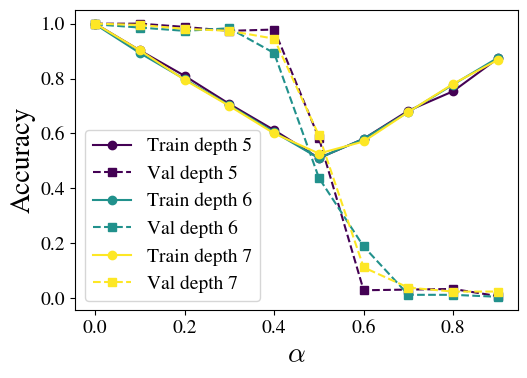

QNN大深度实验结果分析:

深度 5:
  无污染训练精度: 1.0000 ± 0.0000
  无污染验证精度: 1.0000 ± 0.0000
  最大污染训练精度: 0.8732 ± 0.0060
  最大污染验证精度: 0.0071 ± 0.0095

深度 6:
  无污染训练精度: 0.9976 ± 0.0049
  无污染验证精度: 0.9976 ± 0.0048
  最大污染训练精度: 0.8756 ± 0.0049
  最大污染验证精度: 0.0048 ± 0.0095

深度 7:
  无污染训练精度: 1.0000 ± 0.0000
  无污染验证精度: 1.0000 ± 0.0000
  最大污染训练精度: 0.8683 ± 0.0049
  最大污染验证精度: 0.0238 ± 0.0075

图表已生成并保存:
1. xxz_qnn_large_combined.png - 所有深度的训练与验证精度对比图
QNN大深度实验结果可视化完成！


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os


matplotlib.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
matplotlib.rcParams['axes.unicode_minus'] = False

def load_and_visualize_qnn_large():
    try:
    
        qnn_large_data = np.load("xxz_qnn_large.npy", allow_pickle=True)
        
        depths = [5, 6, 7]
        alphas = np.arange(0., 1.0, 0.1)

        train_acc_data = {dep: [] for dep in depths}
        val_acc_data = {dep: [] for dep in depths}
        train_err_data = {dep: [] for dep in depths}
        val_err_data = {dep: [] for dep in depths}

        for i, dep in enumerate(depths):
            dep_results = qnn_large_data[i]

            for j, alpha in enumerate(alphas):
                alpha_results = dep_results[j*5:(j+1)*5]

                train_accs = [r['acc'] for r in alpha_results]
                val_accs = [r['val_acc'] for r in alpha_results]
 
                train_acc_data[dep].append(np.mean(train_accs))
                val_acc_data[dep].append(np.mean(val_accs))
                train_err_data[dep].append(np.std(train_accs))
                val_err_data[dep].append(np.std(val_accs))

        plt.figure(figsize=(5.5, 4))

        colors = plt.cm.viridis(np.linspace(0, 1, 3))
        linestyles = ['-', '--']
        markers = ['o', 's']
        
        for i, dep in enumerate(depths):
            plt.plot(alphas,train_acc_data[dep],color=colors[i], linestyle=linestyles[0], marker=markers[0],
                        label=f'Train depth {dep}')         
            plt.plot(alphas,val_acc_data[dep],color=colors[i], linestyle=linestyles[1], marker=markers[1],
                        label=f'Val depth {dep}')     
        
        plt.xlabel(r'$\alpha$', fontsize=20)
        plt.ylabel('Accuracy', fontsize=20)
        plt.legend(fontsize=14)
        # plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('xxz_qnn_large_combined.png', dpi=300, bbox_inches='tight')
        plt.show()  

load_and_visualize_qnn_large()
